In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
cars=pd.read_csv('car-data.csv')

In [3]:
cars.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [4]:
cars.shape

(15157, 8)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15157 non-null  int64  
 1   price         15157 non-null  int64  
 2   transmission  15157 non-null  object 
 3   mileage       15157 non-null  int64  
 4   fuelType      15157 non-null  object 
 5   tax           15157 non-null  int64  
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 947.4+ KB


In [6]:
cars.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [8]:
cars.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.614748,-0.762574,0.365796,-0.297173,0.004957
price,0.614748,1.000000,-0.517599,0.482964,-0.496844,0.575139
mileage,-0.762574,-0.517599,1.000000,-0.330231,0.328949,0.110513
tax,0.365796,0.482964,-0.330231,1.000000,-0.518440,0.291077
mpg,-0.297173,-0.496844,0.328949,-0.518440,1.000000,-0.277009
engineSize,0.004957,0.575139,0.110513,0.291077,-0.277009,1.000000


<AxesSubplot:>

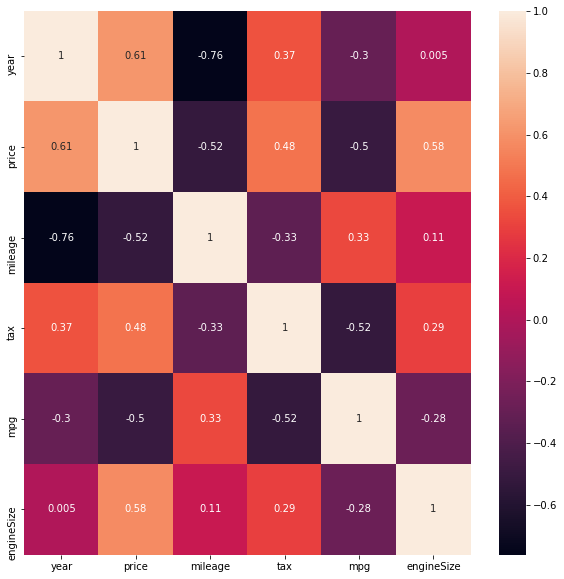

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(cars.corr(), annot=True)

In [10]:
cars.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

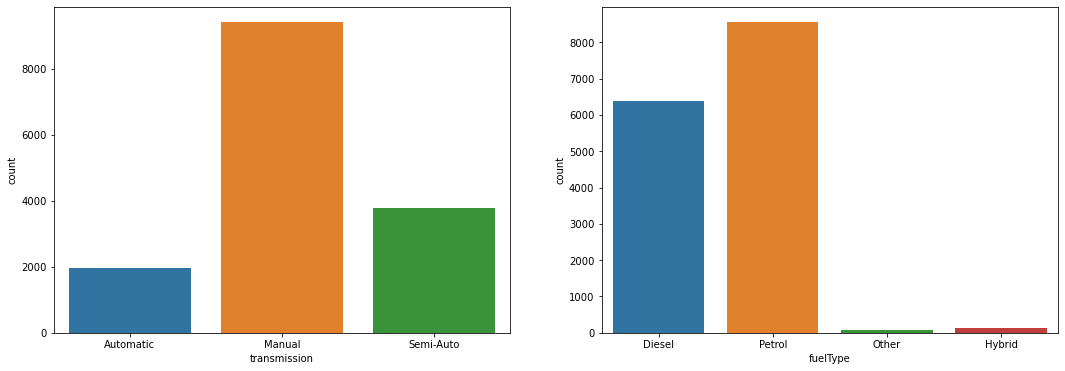

In [11]:

fig = plt.figure(figsize=(18,6))
fig.add_subplot(1,2,1)
sns.countplot(cars['transmission'])
fig.add_subplot(1,2,2)
sns.countplot(cars['fuelType'])

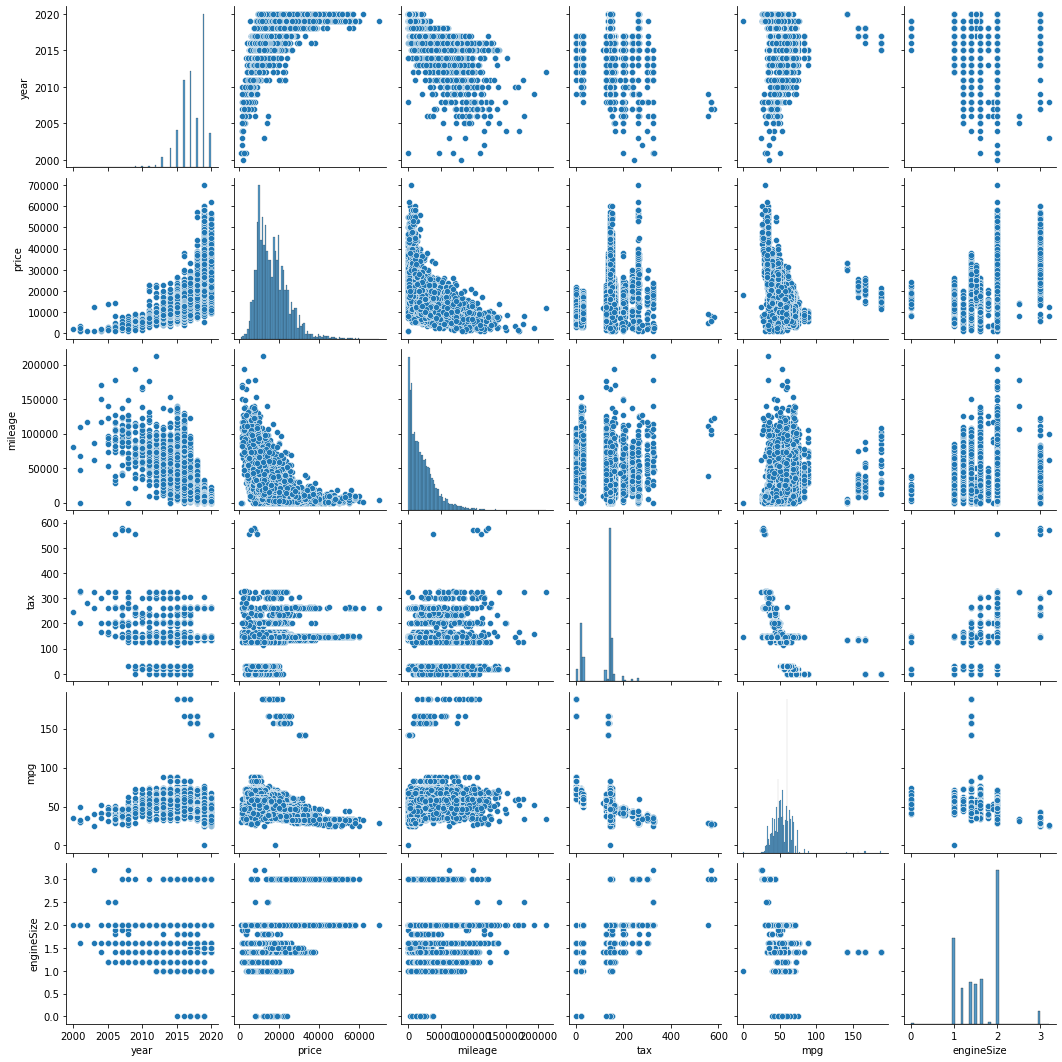

In [12]:
sns.pairplot(data=cars, palette="husl")

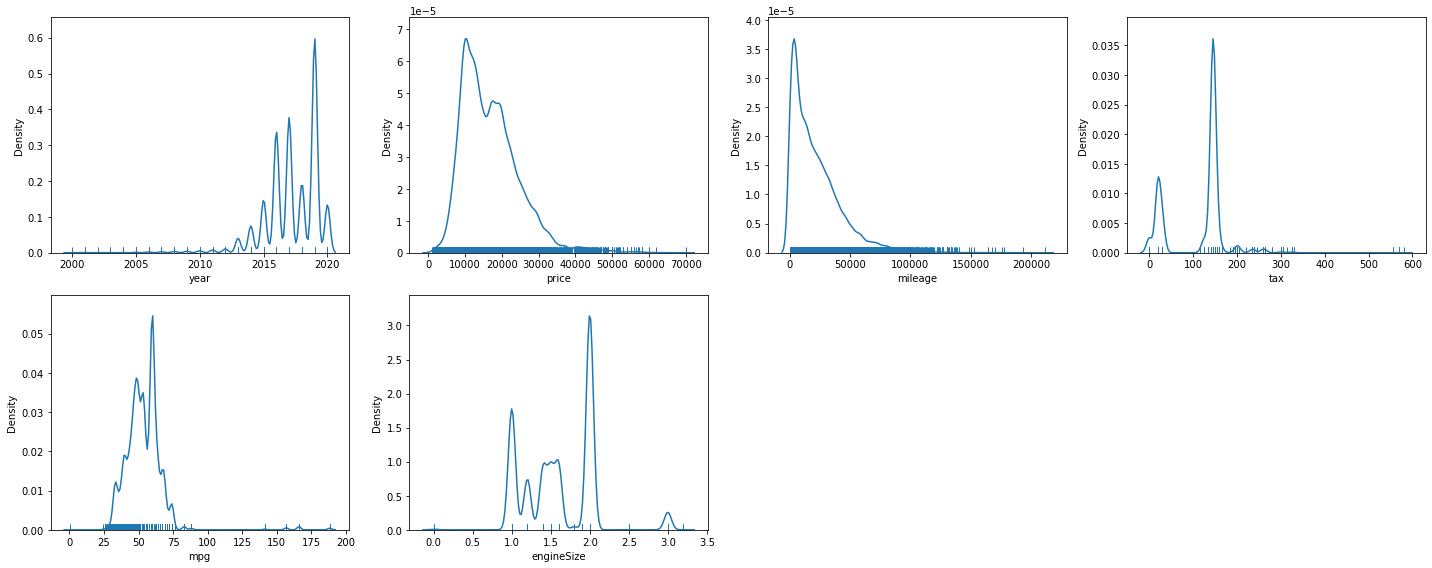

In [13]:
num_cols = cars.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,4,col+1)
    sns.distplot(num_cols.iloc[:,col], hist=False, rug=True, kde_kws={'bw':0.1}, label='UV')
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

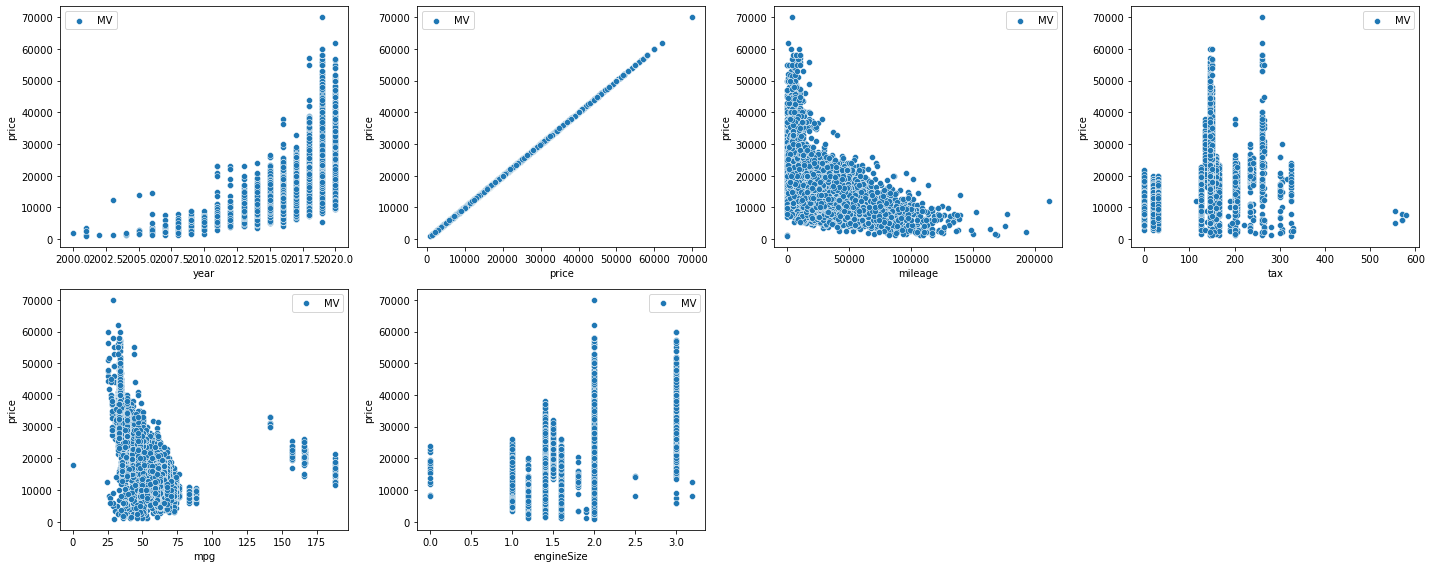

In [14]:
num_cols = cars.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,4,col+1)
    sns.scatterplot(x=num_cols.iloc[:,col], y=cars['price'], label='MV')
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()


In [15]:
cols = [  'year', 'mpg', 'fuelType','tax',
       'transmission', 'engineSize', 'mileage', 'price']

In [16]:
cars = cars[cols]

In [17]:
cars

,year,mpg,fuelType,tax,transmission,engineSize,mileage,price
0,2019,49.6,Diesel,145,Automatic,2.0,13904,25000
1,2019,49.6,Diesel,145,Automatic,2.0,4562,26883
2,2019,50.4,Diesel,145,Manual,2.0,7414,20000
3,2019,32.5,Petrol,145,Automatic,2.0,4825,33492
4,2019,39.8,Petrol,150,Semi-Auto,1.5,6500,22900
...,...,...,...,...,...,...,...,...
15152,2012,58.9,Diesel,125,Manual,2.0,74000,5990
15153,2008,46.3,Petrol,145,Manual,1.2,88102,1799
15154,2009,42.0,Petrol,200,Manual,1.4,70000,1590
15155,2006,46.3,Petrol,150,Manual,1.2,82704,1250


In [18]:
#Printing thw working directory
import os
wd = os.getcwd()

In [19]:
wd

'C:\\Users\\bashi\\Desktop\\placements\\CAPSTONE PROJECT News Classification\\model file for car prediction'

In [20]:
from fastai.tabular import *
#This path will be used for saving and exporting the model
path = wd

In [21]:
#The target variable that we are trying to predict
dep_var = 'price'

#The categorical variables 
cat_names = list(cars.select_dtypes('object').columns)

#The continuous variables
cont_names =['year', 'mpg', 'tax', 'mileage'] #No need to keep the Dependend variable

#Preprocessing steps for the fastai learner
procs = [FillMissing, Categorify, Normalize]

In [22]:
#Creating a validation set
val = TabularList.from_df(cars.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [23]:
#Creating a trainig set
data = (TabularList.from_df(cars, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(len(cars) - int(len(cars) * 0.2),len(cars))))
                           .label_from_df(cols=dep_var)
                           .add_test(val)
                           .databunch())

In [24]:
data.show_batch(5)

fuelType,transmission,year,mpg,tax,mileage,target
Petrol,Manual,-0.6617,0.4046,-1.4825,-0.2478,10591
Diesel,Manual,-0.6617,0.1499,0.2487,0.9491,11991
Diesel,Semi-Auto,0.3525,-0.5719,0.5785,-0.5324,21841
Petrol,Manual,-0.1546,0.3197,0.6609,-0.3268,11499
Petrol,Semi-Auto,0.8596,-1.5271,0.5785,-0.9126,29495


In [25]:
learn = tabular_learner(data, layers=[1000, 200, 15], metrics=accuracy, emb_drop=0.1, callback_fns=ShowGraph)

In [26]:
# select the appropriate learning rate
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,8.214288,7.236195,0.000000,02:35
1,8.127359,8.201571,0.000000,02:40
2,7.943666,7.228802,0.000000,02:38
3,7.607606,7.563415,0.000000,25:04
4,7.267999,7.448568,0.000000,01:36
5,6.980707,7.869110,0.000000,02:09
6,6.799109,7.773171,0.000000,02:09
7,6.658750,8.119229,0.000000,02:07
8,6.548508,7.353467,0.000000,02:05
9,6.496374,7.262680,0.000000,01:10


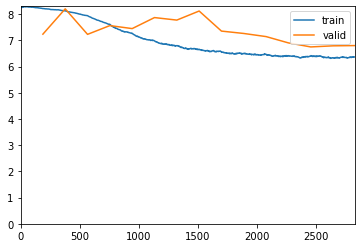

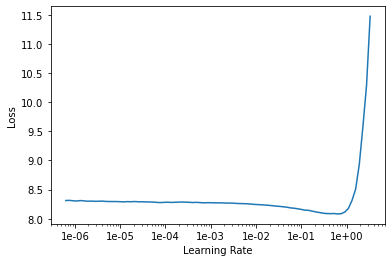

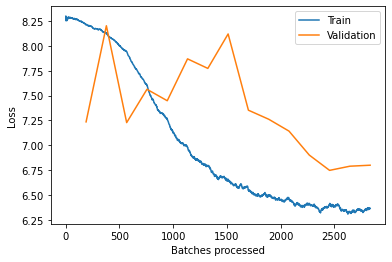

In [27]:

# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-03))

# Analyse our model
learn.model
learn.recorder.plot_losses()

In [28]:
learn.show_results(ds_type=DatasetType.Train)

fuelType,transmission,year,mpg,tax,mileage,target,prediction
Diesel,Manual,-2.1829,0.5957,-1.3176,2.6762,7388,7995
Diesel,Manual,-0.1546,0.4966,0.5785,0.8425,10700,14995
Petrol,Manual,-0.6617,-1.0318,1.4854,0.5881,18390,18990
Petrol,Manual,0.8596,-0.6214,0.5785,-0.9835,21995,17298
Petrol,Manual,1.3666,-0.3383,0.5785,-1.0514,19990,17298


In [29]:
learn.show_results(ds_type=DatasetType.Valid)

fuelType,transmission,year,mpg,tax,mileage,target,prediction
Petrol,Manual,-5.7324,-0.5719,0.6609,2.9013,1275,5995
Petrol,Manual,-5.7324,-0.5719,0.6609,2.9013,1275,5995
Petrol,Manual,-5.2254,-0.5719,0.5785,2.4848,1275,5995
Petrol,Manual,-5.2254,-0.5719,0.5785,2.4848,1275,5995
Petrol,Manual,-5.7324,-0.5719,0.6609,2.9013,1275,5995


In [30]:
learn.save('model',return_path=True)

WindowsPath('C:/Users/bashi/Desktop/placements/CAPSTONE PROJECT News Classification/model file for car prediction/models/model.pth')

In [31]:
learn.export('model.pkl')